In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum().sum())

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset Shape: (569, 31)
Missing Values:
 0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

train_acc = log_reg.score(X_train, y_train)
test_acc = log_reg.score(X_test, y_test)

print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")


Training Accuracy: 0.9868
Testing Accuracy:  0.9737


In [5]:
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=5)
print(f"\n5-Fold CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


5-Fold CV Scores: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Mean CV Score: 0.9807
Standard Deviation: 0.0065



--- Model Metrics ---
Accuracy:  0.9737
Precision: 0.9722
Recall:    0.9859
F1-Score:  0.9790


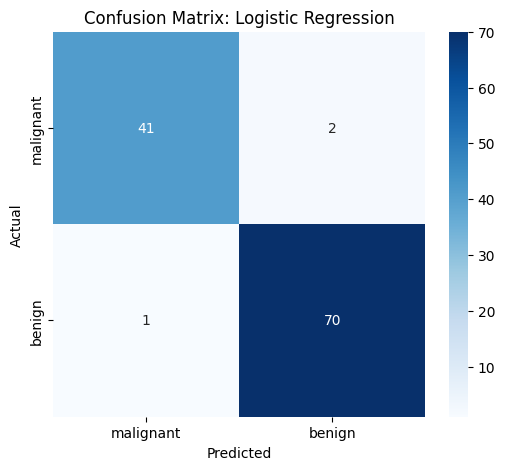

In [6]:
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Model Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

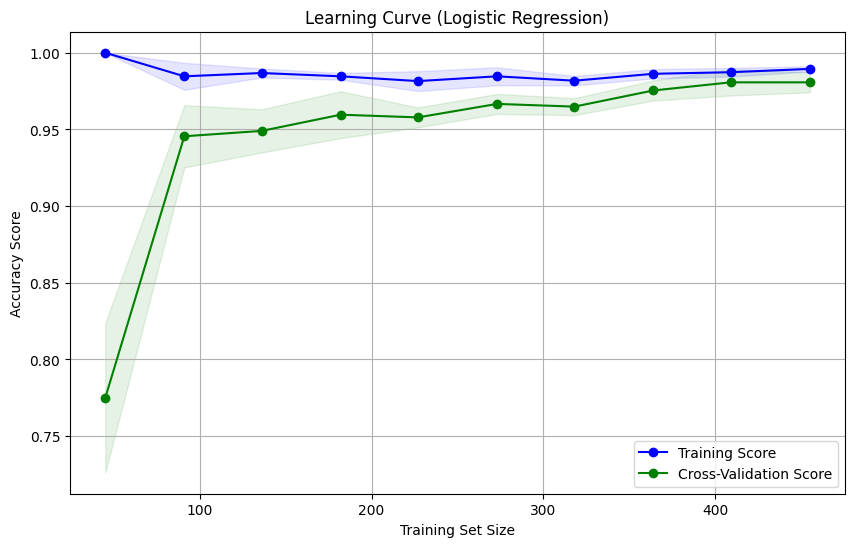

In [7]:
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')
plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color="green", marker='o')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

**Challenge(Optional +10pts)**

In [8]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Decision Tree Accuracy:       {acc_dt:.4f}")

if acc_log > acc_dt:
    print("\nConclusion: Logistic Regression performed better.")
    print("Reason: The breast cancer dataset is linearly separable (or close to it), which favors linear models like Logistic Regression over complex non-linear trees.")
else:
    print("\nConclusion: Decision Tree performed better.")
    print("Reason: The tree was able to capture non-linear relationships that the Logistic Regression missed.")

Logistic Regression Accuracy: 0.9737
Decision Tree Accuracy:       0.9474

Conclusion: Logistic Regression performed better.
Reason: The breast cancer dataset is linearly separable (or close to it), which favors linear models like Logistic Regression over complex non-linear trees.
